In [21]:
import pandas as pd
import json
import matplotlib.pyplot as plt

# Data Extraction

In [8]:
data = []
with open("jobs.jl", "r") as file:
    for line in file:
        data.append(json.loads(line))
jobs = pd.DataFrame(data)
jobs.head()
jobs.drop("location", axis=1, inplace=True)

,title,company,salary,technologies
0,Middle+ Python Developer,JOIDY,None,[]
1,Strong Middle Python Developer,Chatmasters,None,"[PostgresSQL, Mongo DB, Flask, FastAPI, WebSoc..."
2,Software Engineer (Python),SPS Commerce,None,[]
3,Senior Python Engineer (Application Platform T...,PandaDoc,$5800-7000,"[Python, Django, asyncio, FastAPI, RabbiMQ, Ka..."
4,Fullstack Software Developer (Python+React)/ A...,Forex Tester Software Inc,None,"[Python, React, AI, svelte, Angular, Vue]"
...,...,...,...,...
297,Fullstack web developer Django+React,Thelassa.fun,None,"[Django, React, AWS, Full-stack Web Development]"
298,Senior Python Engineer (not from Ukraine),Teramind,$5500-7500,[Python]
299,Midlle Python Developer,UnderDefense,None,[]
300,JobTestPrep - Python Developer,SD Solutions,$1000-4000,[]


# Data Cleaning

In [10]:
jobs.drop("location", axis=1, inplace=True)
jobs = jobs[jobs["technologies"].apply(lambda x: len(x) != 0)]
jobs.head()

,title,company,salary,technologies
1,Strong Middle Python Developer,Chatmasters,None,"[PostgresSQL, Mongo DB, Flask, FastAPI, WebSoc..."
3,Senior Python Engineer (Application Platform T...,PandaDoc,$5800-7000,"[Python, Django, asyncio, FastAPI, RabbiMQ, Ka..."
4,Fullstack Software Developer (Python+React)/ A...,Forex Tester Software Inc,None,"[Python, React, AI, svelte, Angular, Vue]"
6,Django developer (Middle),PLANEKS,РІС–Рґ $3000,"[Python, Django, FastAPI, Celery]"
7,Middle Backend engineer on the project,Data Science UA,None,"[Flask, FastAPI]"


# Data Analysis

In [87]:
flattened_technologies = jobs["technologies"].explode()
technology_counts = flattened_technologies.value_counts()
top_technologies = technology_counts.head(20)
print(top_technologies)

technologies
Python                   177
Django                    67
AWS                       39
SQL                       27
FastAPI                   23
PostgreSQL                22
Flask                     20
Python3                   16
NoSQL                     13
Django Rest Framework     13
Machine Learning          13
React                     12
REST API                  12
Docker                    12
Kubernetes                11
Celery                    11
Redis                     10
JavaScript                10
Linux                     10
DevOps                     8
Name: count, dtype: int64


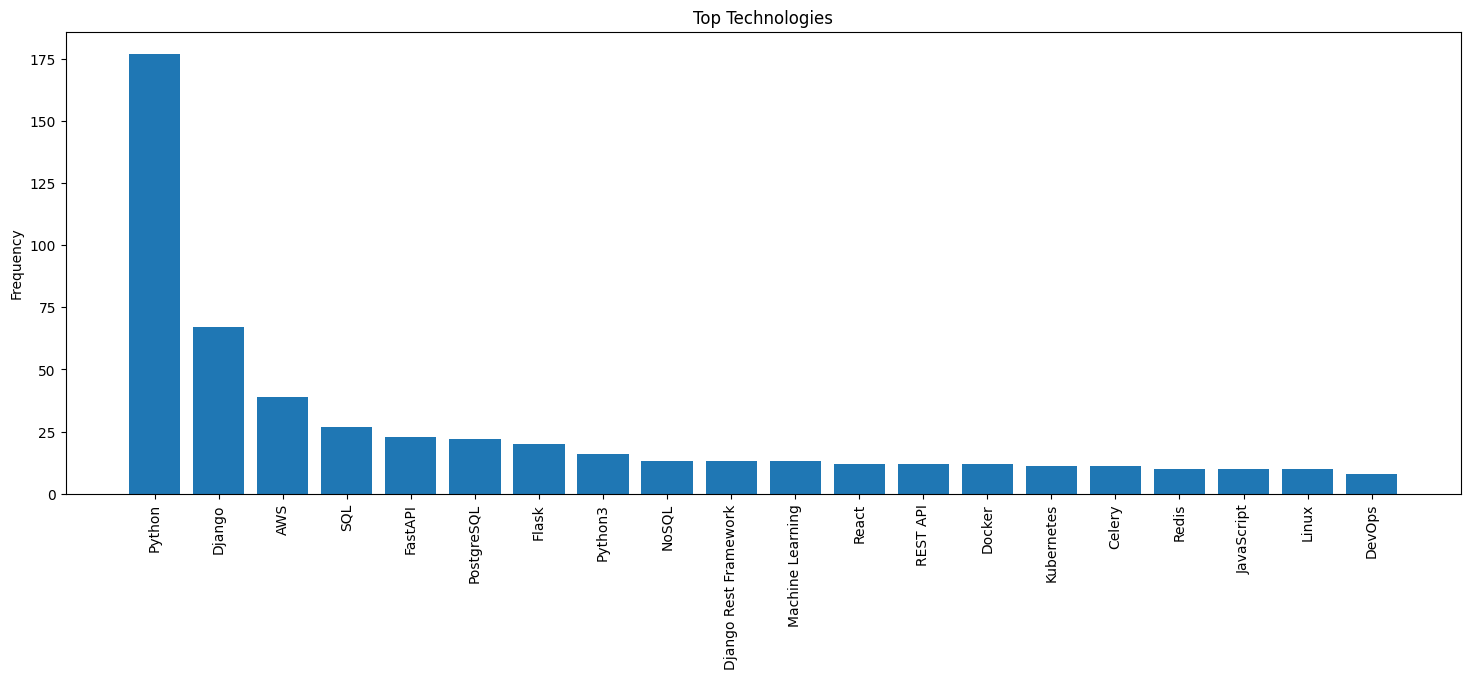

In [90]:
plt.figure(figsize=(18, 6))
plt.bar(top_technologies.index, top_technologies.values)
plt.ylabel("Frequency")
plt.title("Top Technologies")
plt.xticks(rotation=90)
plt.show()

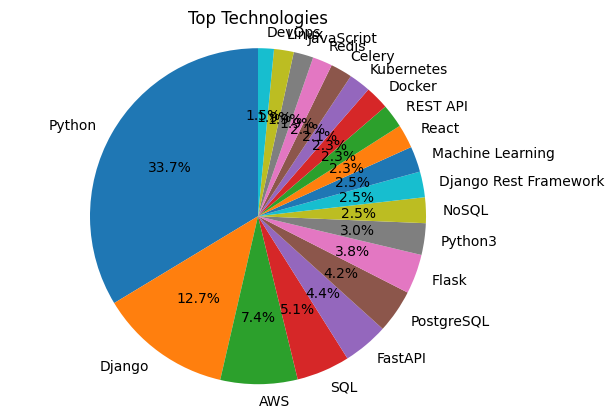

In [89]:
fig, ax = plt.subplots()
plt.pie(
    top_technologies.values,
    labels=top_technologies.index,
    autopct="%1.1f%%",
    startangle=90,
)
plt.axis("equal")
plt.title("Top Technologies")
# plt.legend(labels=top_technologies.index, title='Technologies', loc='upper left', prop={'size': 12})


plt.show()